D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Basic Clustering Result:


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target,Basic Cluster
0,1.108936,1.540492,0.493516,-0.529740,0.982175,1.177544,1.623025,1.357325,0.966041,-0.504924,0,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0,1
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0,1
3,1.476534,0.548523,-0.115420,-0.875408,1.301216,0.410295,1.171878,-1.034471,-1.654176,1.344601,0,0
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0,2
5,1.198029,1.456806,0.033723,-0.781340,1.351682,1.455573,1.931239,0.772315,-0.135526,-0.158399,0,1
6,2.663044,-1.265577,-0.333946,-0.567880,0.806199,-2.330133,-0.476078,0.212820,0.716046,4.412830,0,0
7,-3.223998,-2.663517,-0.660028,-1.772420,1.097073,-0.519581,-2.099062,0.549430,-1.229018,2.822862,0,2
8,2.253113,-0.380743,-0.264321,0.125245,-0.300638,-2.984586,-1.337590,1.280215,0.851576,2.703927,0,2
9,-0.471472,-0.942955,-0.324895,-1.653258,1.314006,4.286545,2.193685,0.169245,0.833637,0.507878,0,0


D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:8

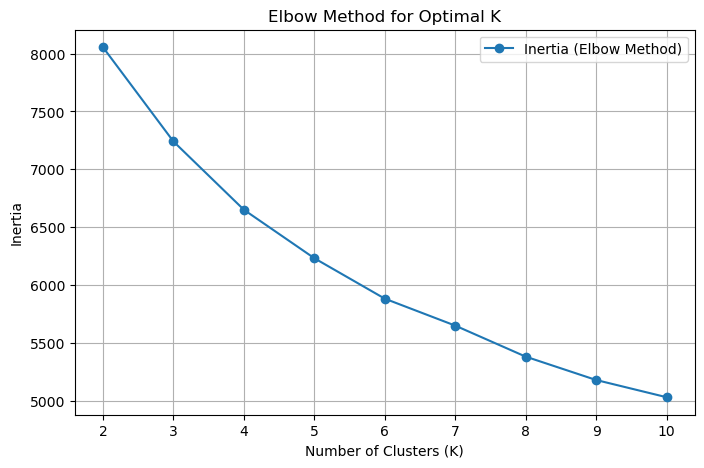

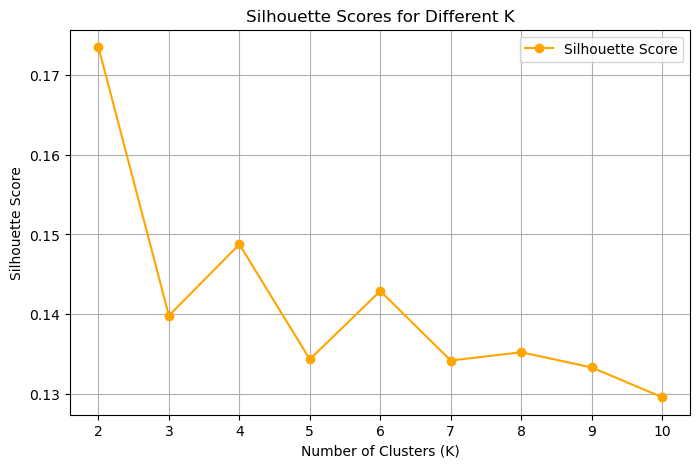

D:\ANACONDA_Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


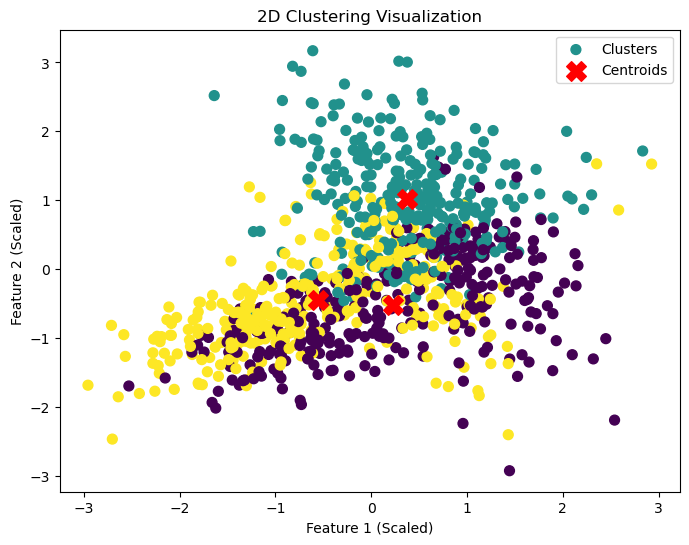

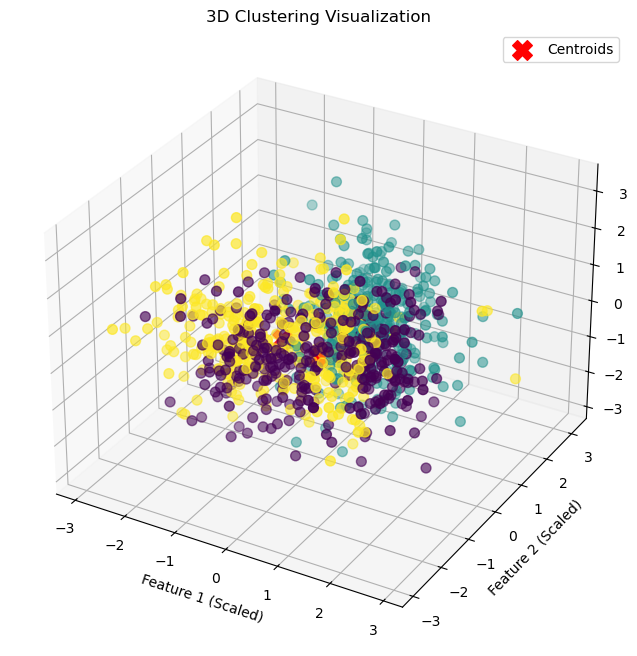

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = "dataset_1.csv"
data = pd.read_csv(file_path)

# Separate features and target variable
features = data.drop(columns=['target'])  # Assuming 'target' is the column name
target = data['target']  # For later comparison (if needed)

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Basic Clustering (K=3 for demonstration)
basic_k = 3
basic_kmeans = KMeans(n_clusters=basic_k, random_state=42)
basic_clusters = basic_kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataset for basic clustering
data['Basic Cluster'] = basic_clusters

# Display the first few rows of the clustered dataset
print("Basic Clustering Result:")
display(data.head(10))

# Step 3: Selecting the Optimal K using Elbow Method and Silhouette Score
# Elbow Method
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)  # Start from 2 to avoid silhouette issues

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', label='Inertia (Elbow Method)')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

# Step 4: Visualizing Results in 2D
optimal_k = 3  # Example optimal K based on elbow and silhouette
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
optimal_clusters = optimal_kmeans.fit_predict(scaled_features)

# Add optimal clustering labels to the dataset
data['Optimal Cluster'] = optimal_clusters

# 2D Visualization (First two features)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=optimal_clusters, cmap='viridis', s=50, label='Clusters')
plt.scatter(optimal_kmeans.cluster_centers_[:, 0], optimal_kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('2D Clustering Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

# Step 5: Visualizing Results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2],
           c=optimal_clusters, cmap='viridis', s=50)
ax.scatter(optimal_kmeans.cluster_centers_[:, 0], optimal_kmeans.cluster_centers_[:, 1],
           optimal_kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
ax.set_title('3D Clustering Visualization')
ax.set_xlabel('Feature 1 (Scaled)')
ax.set_ylabel('Feature 2 (Scaled)')
ax.set_zlabel('Feature 3 (Scaled)')
ax.legend()
plt.show()
